In [2]:
#Import Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#Load the dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

c:\Users\Shah Alam\anaconda3\envs\python_course_new\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [17]:
df_US = df[df['job_country'] == 'United States'].copy()


In [20]:
df_US['job_posted_month'] = df_US['job_posted_date'].dt.strftime('%B')

In [25]:
df_US.head(2)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None,June
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',...",July


In [28]:
df_US_pivot = df_US.pivot_table(index='job_posted_month',columns='job_title_short', aggfunc='size')

In [29]:
df_US_pivot.reset_index(inplace=True)
df_US_pivot['month_no'] = pd.to_datetime(df_US_pivot['job_posted_month'], format='%B').dt.month
df_US_pivot.sort_values('month_no', inplace=True)
df_US_pivot.set_index('job_posted_month', inplace=True)
df_US_pivot.drop(columns='month_no',inplace=True)

In [39]:
df_US_pivot

%store df_US_pivot


Stored 'df_US_pivot' (DataFrame)


<Axes: xlabel='job_posted_month'>

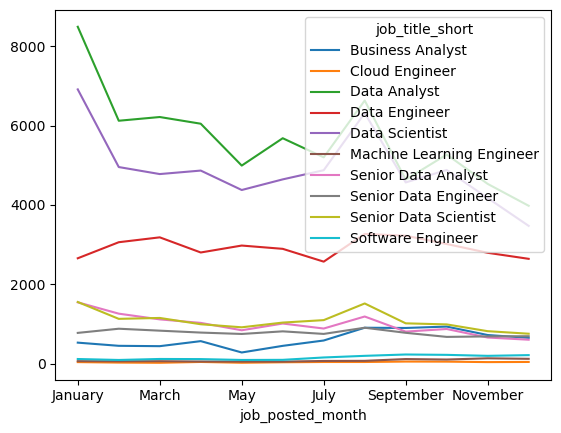

In [31]:
df_US_pivot.plot(kind='line')

In [34]:
top_3 = df_US['job_title_short'].value_counts().head(3).index.to_list()

In [35]:
top_3

['Data Analyst', 'Data Scientist', 'Data Engineer']

<Axes: xlabel='job_posted_month'>

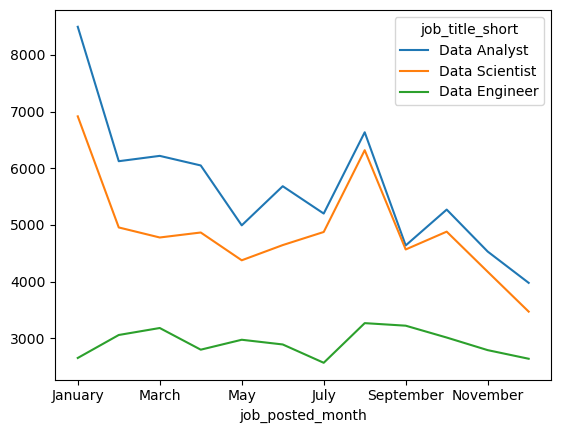

In [36]:
df_US_pivot[top_3].plot(kind='line')

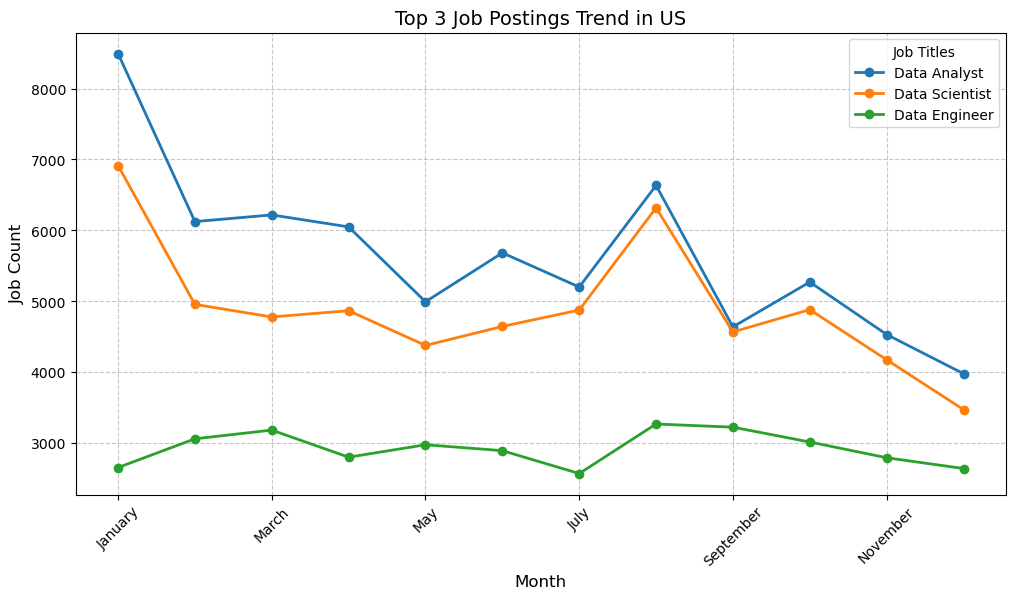

In [38]:

df_US_pivot[top_3].plot(kind='line', marker='o', linestyle='-', figsize=(12, 6), linewidth=2)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Job Count', fontsize=12)
plt.title('Top 3 Job Postings Trend in US', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Job Titles', fontsize=10)
plt.show()
